In [1]:
%matplotlib inline

import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import muon
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=400, figsize=(20,5))

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [2]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/EDA"

In [3]:
mudata = muon.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation_all.h5mu")
adata = mudata["rna"]
adata.obsm["X_umap_gex"] = adata.obsm["X_umap"]
adata.obsm["X_umap"] = mudata.obsm["X_umap"]
adata.obsm["X_umap_atac"] = mudata["atac"].obsm["X_umap"]

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [4]:
adata.X = adata.layers["raw_counts"]
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [5]:
figsize=(20,5)

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


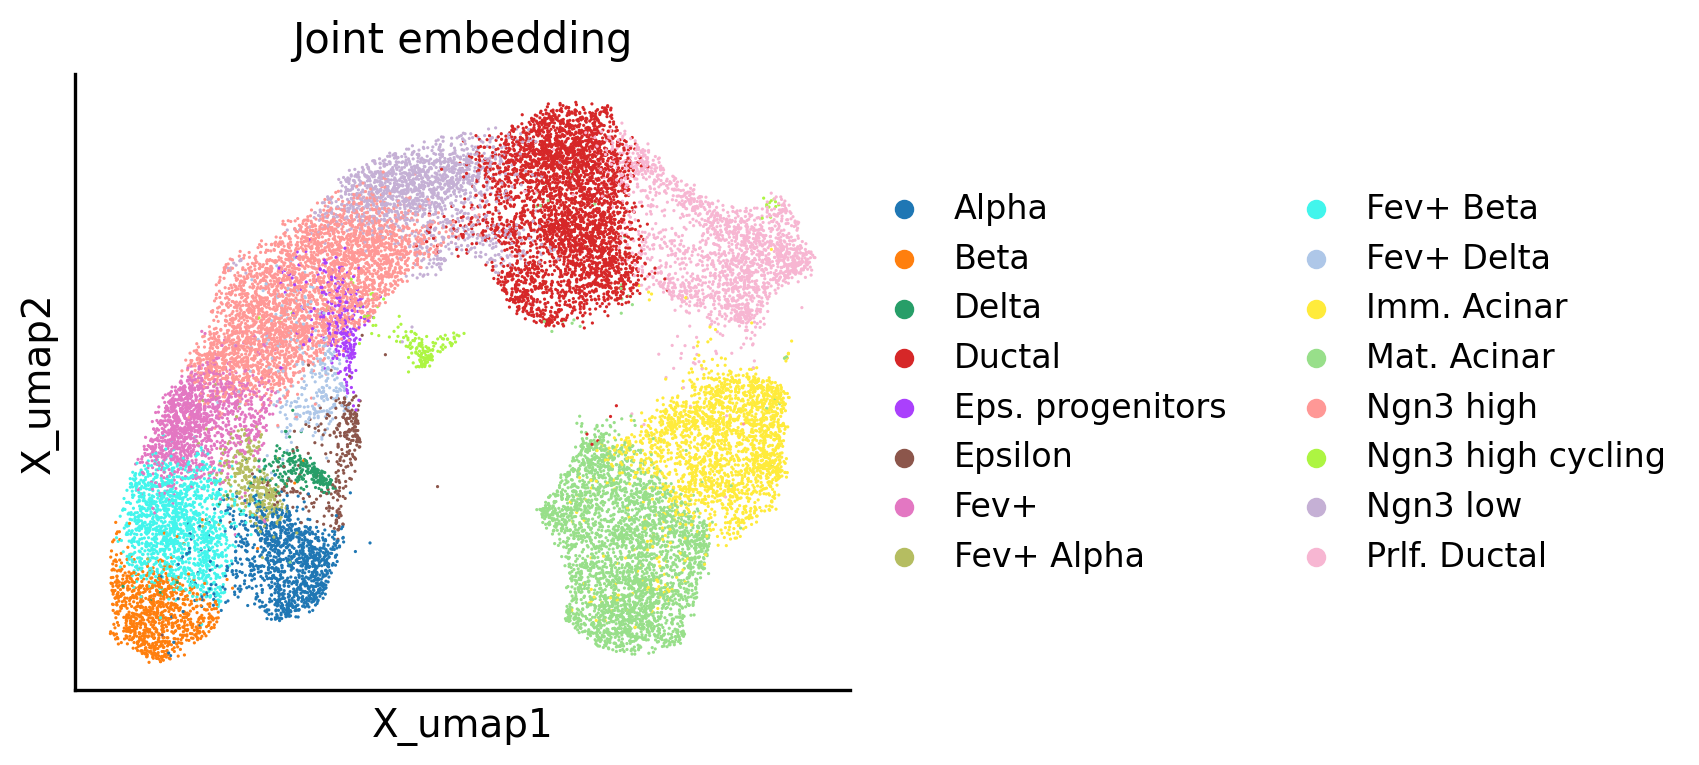

In [6]:
fig, ax = plt.subplots(figsize=(5, 4))
fig = sc.pl.embedding(adata, basis="X_umap", color=["cell_type"], title="Joint embedding", show=False, ax=ax)

In [7]:
fig.figure.savefig(os.path.join(output_dir, 'umap_joint.png'))

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


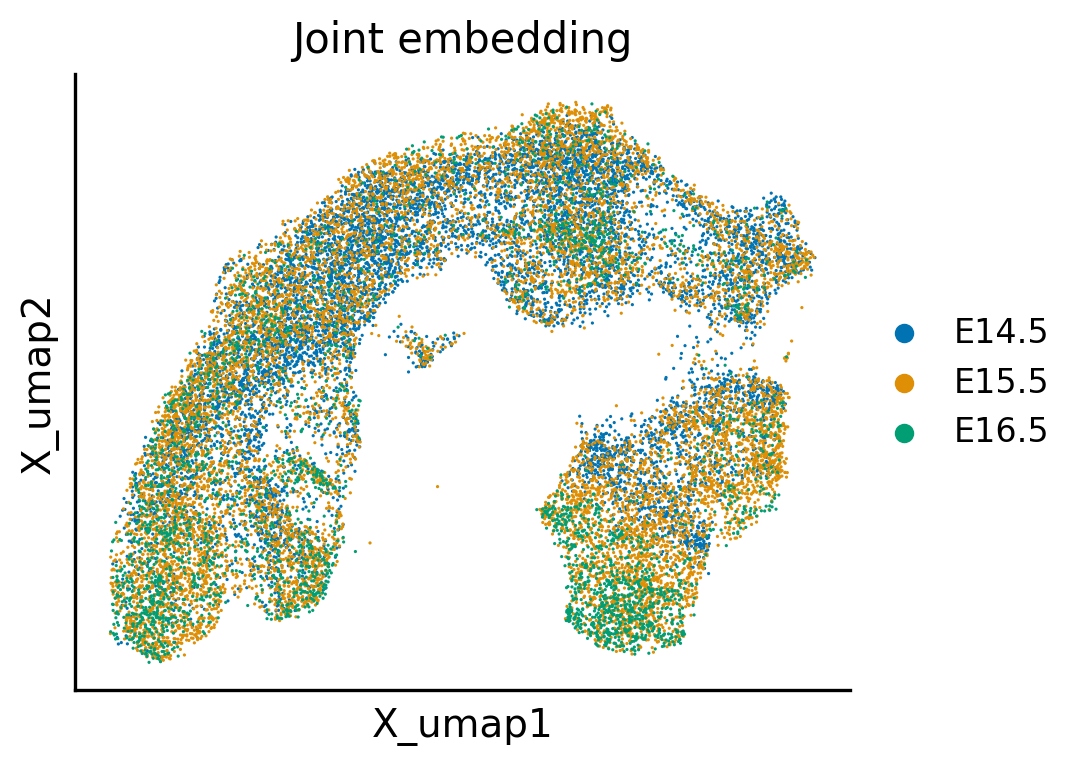

In [8]:
import seaborn as sns
palette = sns.color_palette("colorblind", 3)

fig, ax = plt.subplots(figsize=(5, 4))
fig = sc.pl.embedding(adata, basis="X_umap", color=["stage"], ax=ax, title="Joint embedding", palette=palette, show=False)

In [9]:
fig.figure.savefig(os.path.join(output_dir, 'umap_joint_stage.png'))

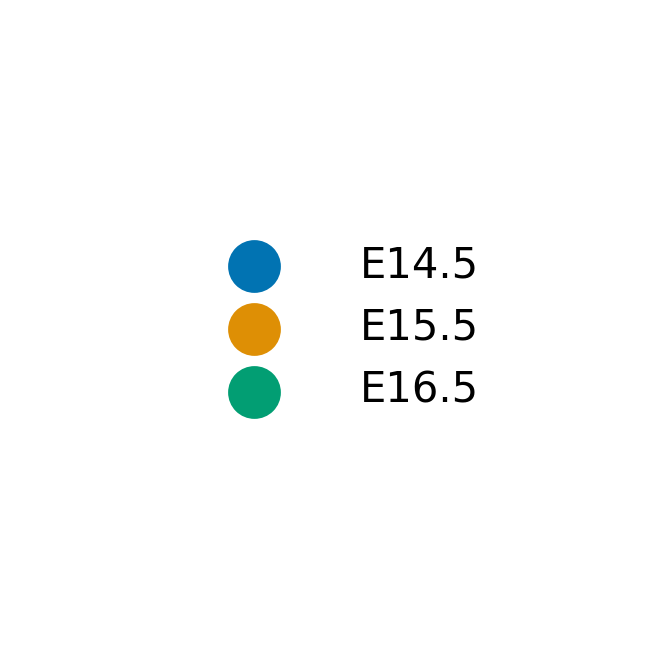

In [10]:
label_params = fig.get_legend_handles_labels() 
figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, fontsize=25, loc="center", bbox_to_anchor=(0.5, 0.5), handlelength=3.5, markerscale=3.0, prop={"size": 15})



In [11]:
axl.figure.savefig(os.path.join(output_dir, 'legend_stage_only.png'))

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


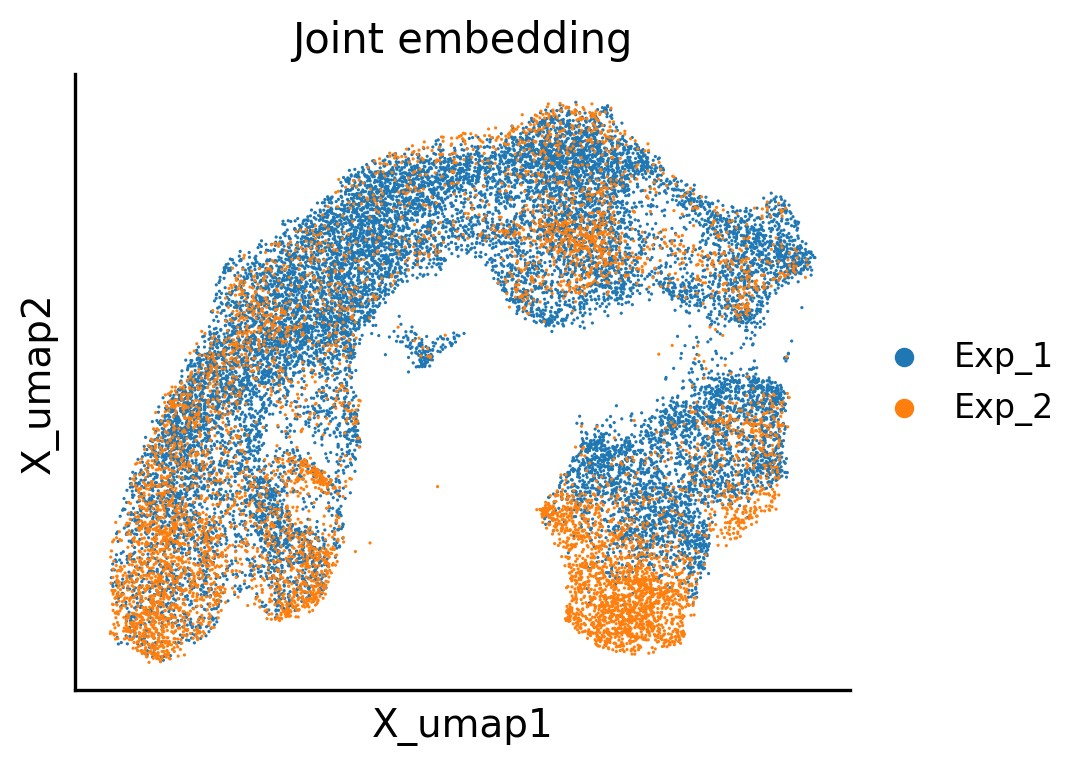

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))

fig = sc.pl.embedding(adata, basis="X_umap", color=["experiment_batch"], ax=ax, title="Joint embedding", show=False)

In [13]:
fig.figure.savefig(os.path.join(output_dir, 'umap_joint_experiment_batch.png'))

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


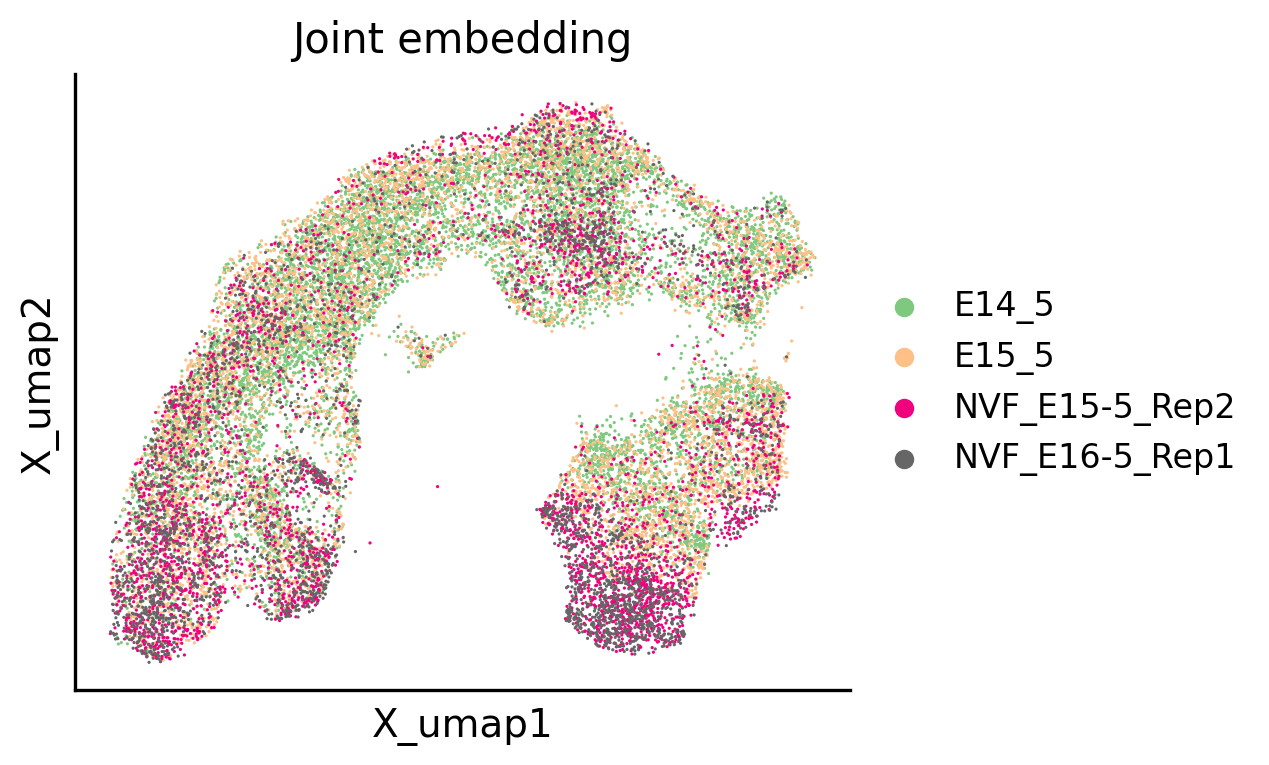

In [14]:
fig, ax = plt.subplots(figsize=(5, 4))

fig = sc.pl.embedding(adata, basis="X_umap", color=["sample"], ax=ax, title="Joint embedding", show=False, palette='Accent')

In [15]:
fig.figure.savefig(os.path.join(output_dir, 'umap_joint_sample.png'))

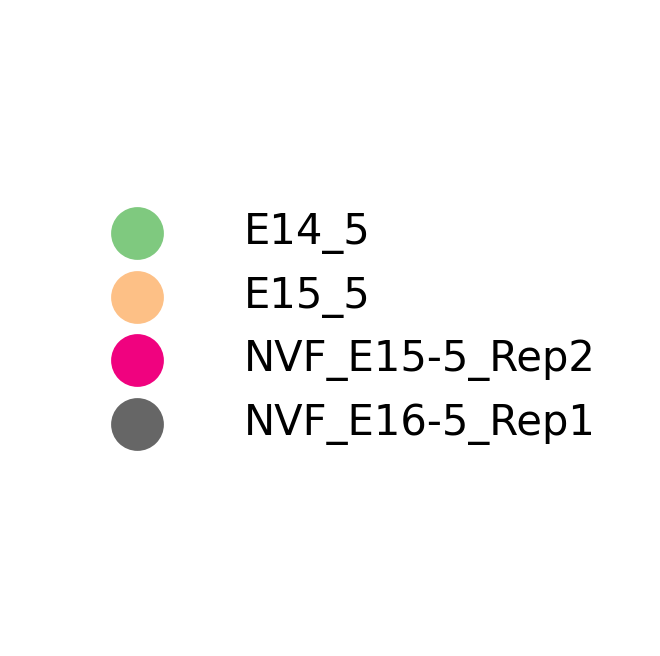

In [16]:
label_params = fig.get_legend_handles_labels() 
figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, fontsize=25, loc="center", bbox_to_anchor=(0.5, 0.5), handlelength=3.5, markerscale=3.0, prop={"size": 15})



In [17]:
axl.figure.savefig(os.path.join(output_dir, 'legend_exp_sample.png'))

In [18]:
adata.obsm["X_umap_gex"] = -adata.obsm["X_umap_gex"]

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


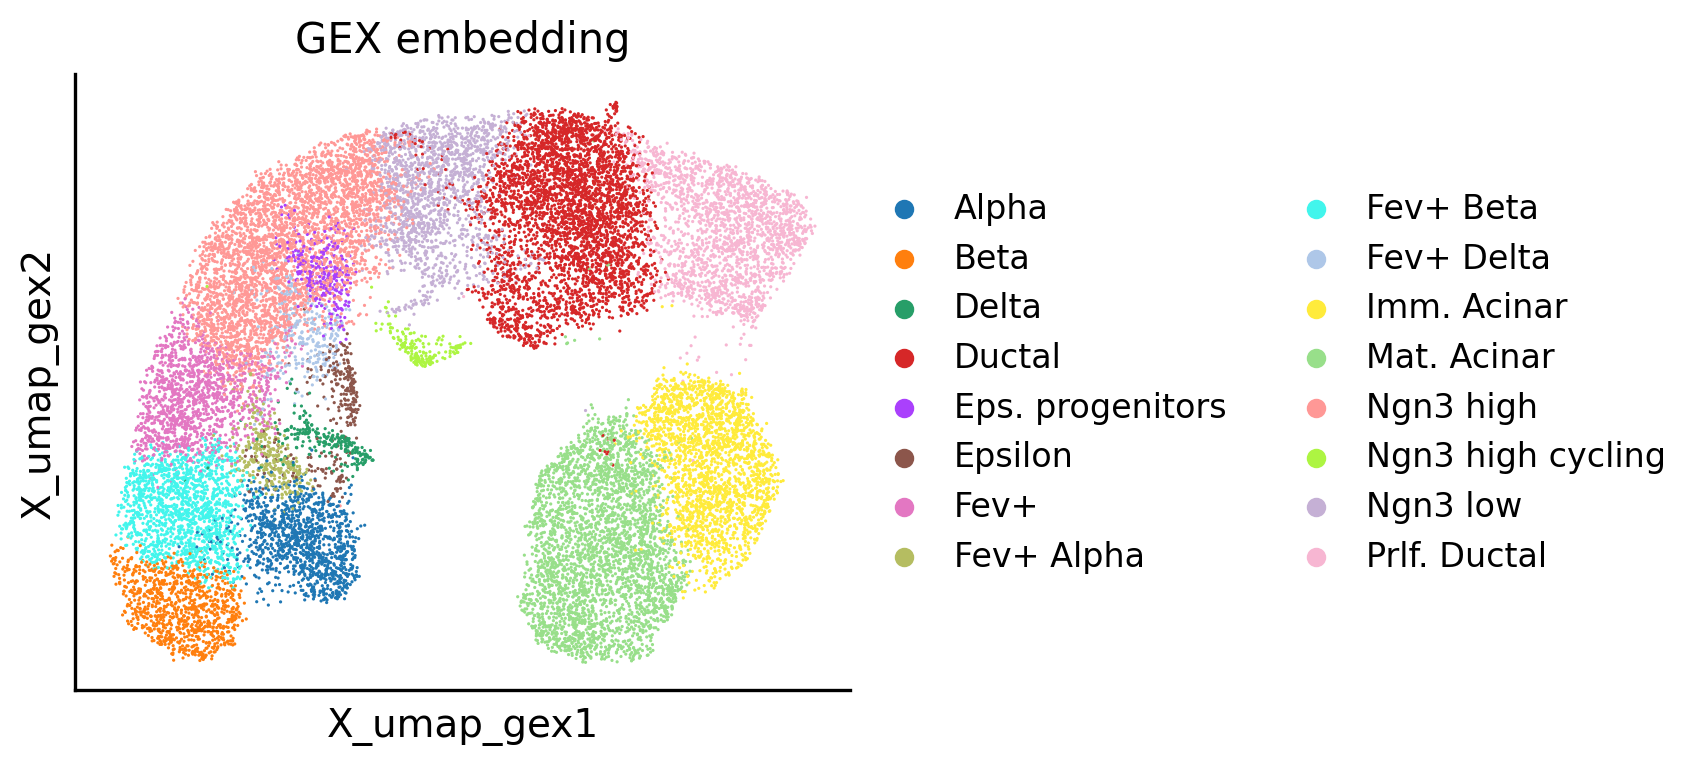

In [19]:
fig, ax = plt.subplots(figsize=(5, 4))
fig = sc.pl.embedding(adata, basis="X_umap_gex", color=["cell_type"],ax=ax,  title="GEX embedding", show=False)

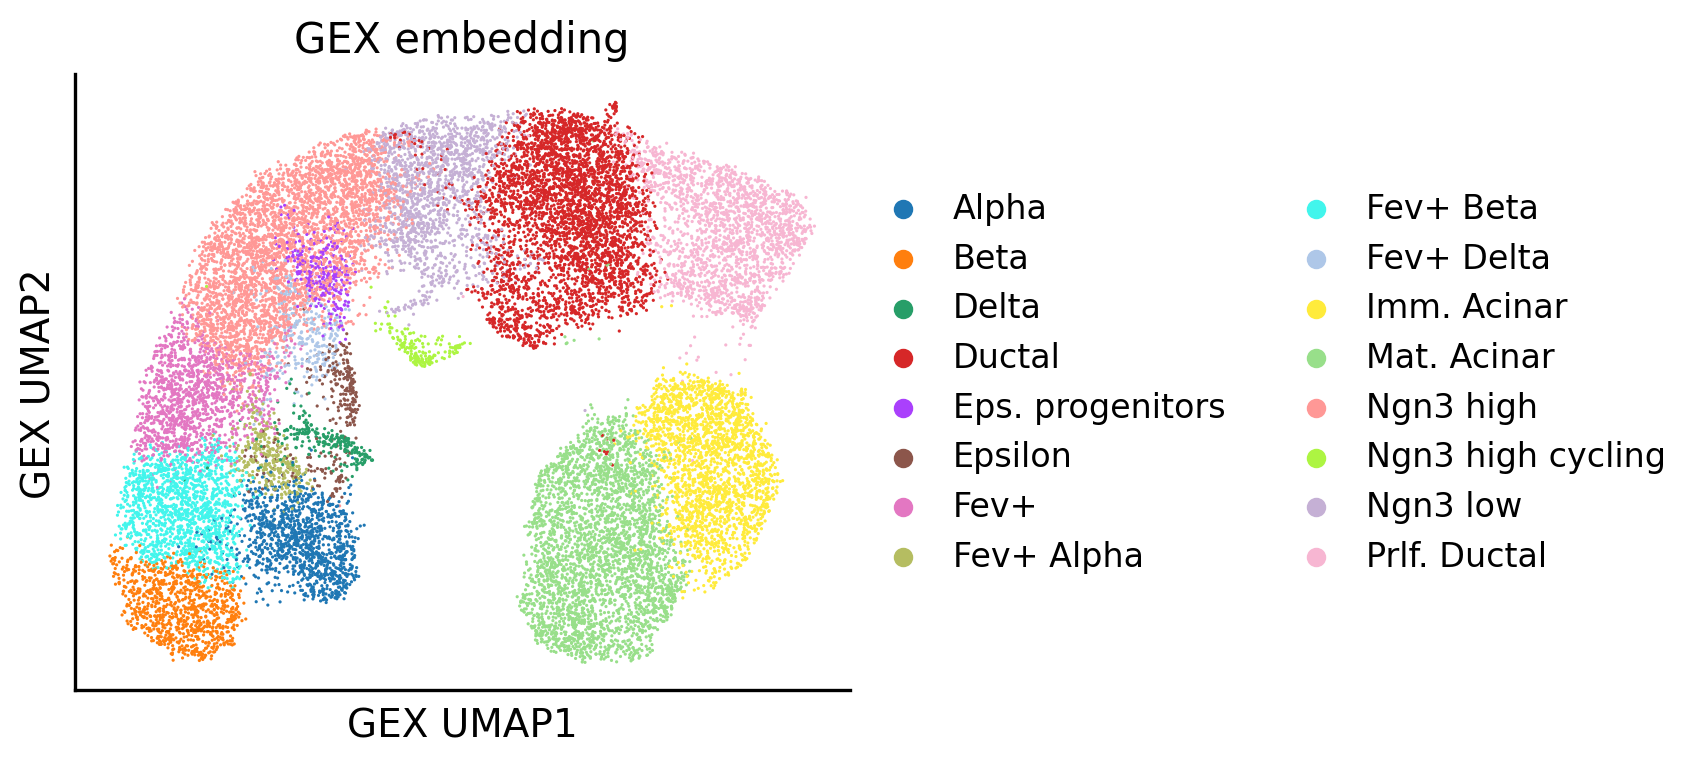

In [20]:
fig.set_xlabel("GEX UMAP1")
fig.set_ylabel("GEX UMAP2")
fig.figure

In [21]:
fig.figure.savefig(os.path.join(output_dir, 'umap_gex.png'))

In [24]:
adata.obsm["X_umap_atac"][:,1] = -adata.obsm["X_umap_atac"][:,1]

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


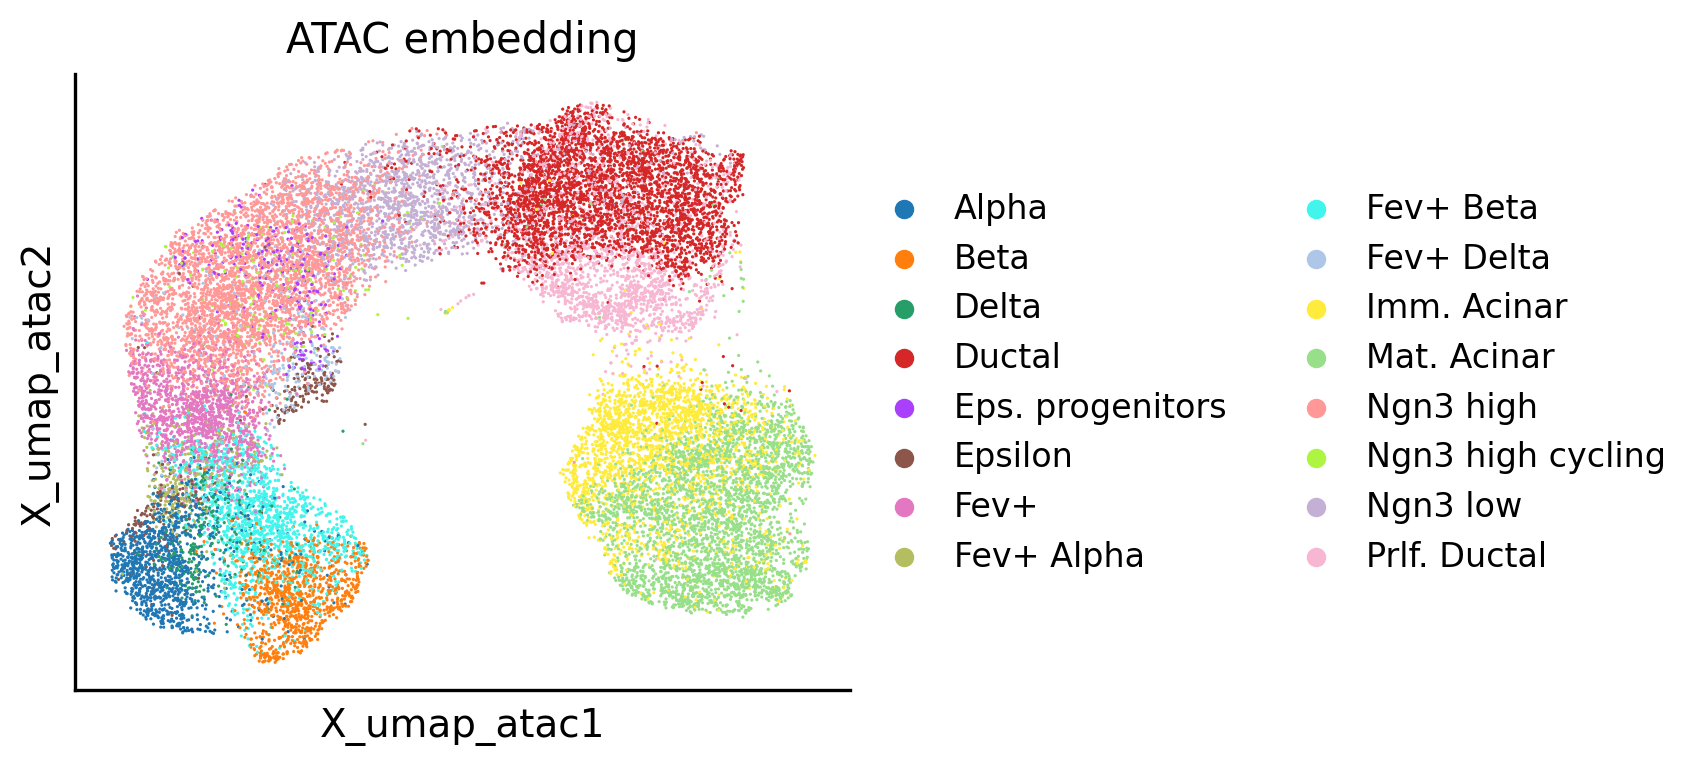

In [25]:
fig, ax = plt.subplots(figsize=(5, 4))
fig = sc.pl.embedding(adata, basis="X_umap_atac", color=["cell_type"], ax=ax, title="ATAC embedding", show=False)

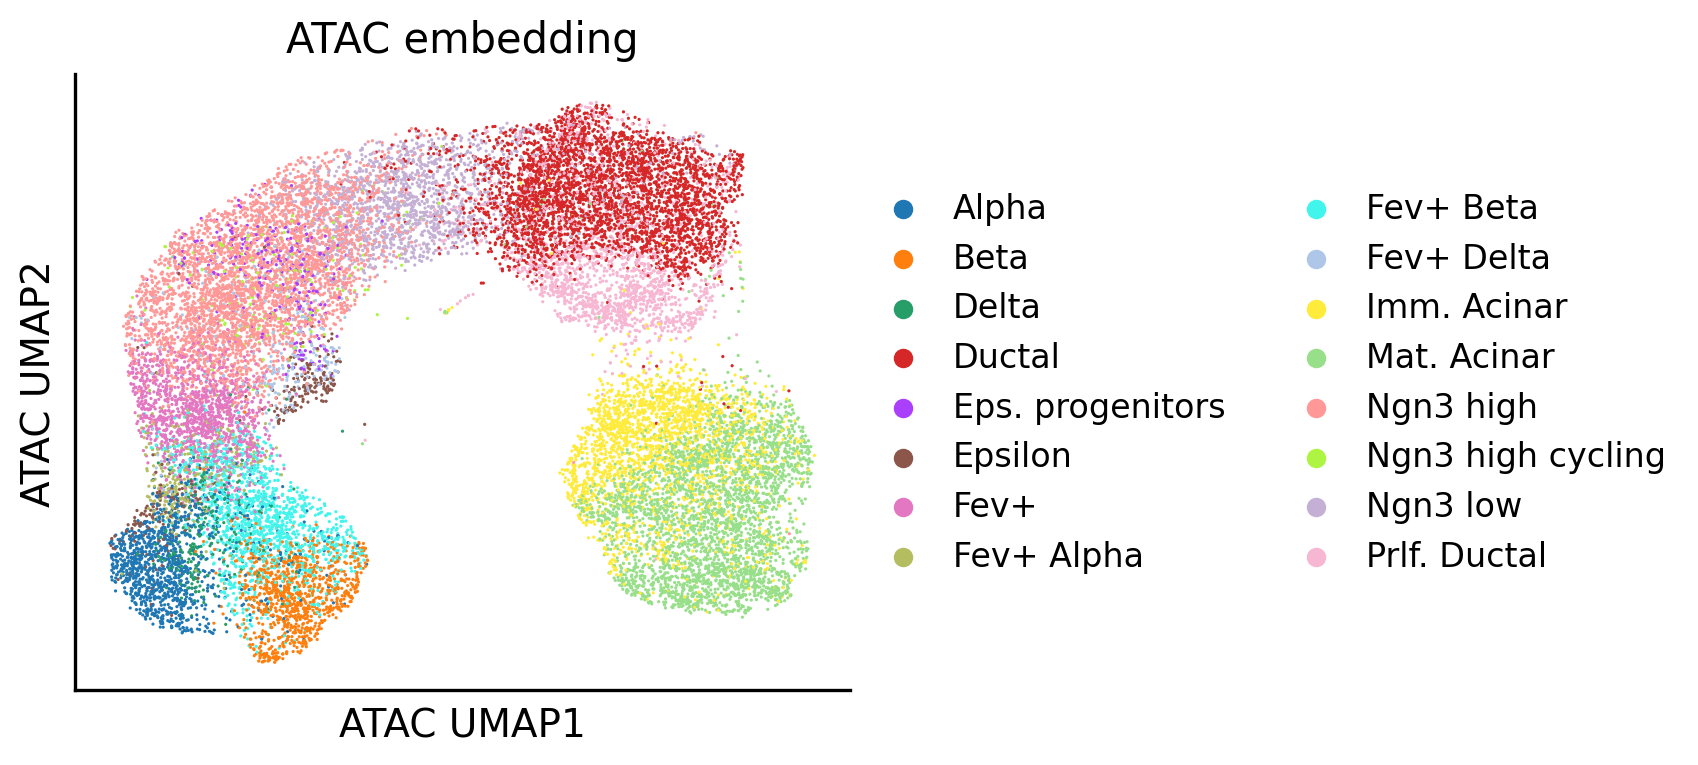

In [26]:
fig.set_xlabel("ATAC UMAP1")
fig.set_ylabel("ATAC UMAP2")
fig.figure

In [27]:
fig.figure.savefig(os.path.join(output_dir, 'umap_atac.png'))

In [28]:
label_params = fig.get_legend_handles_labels() 

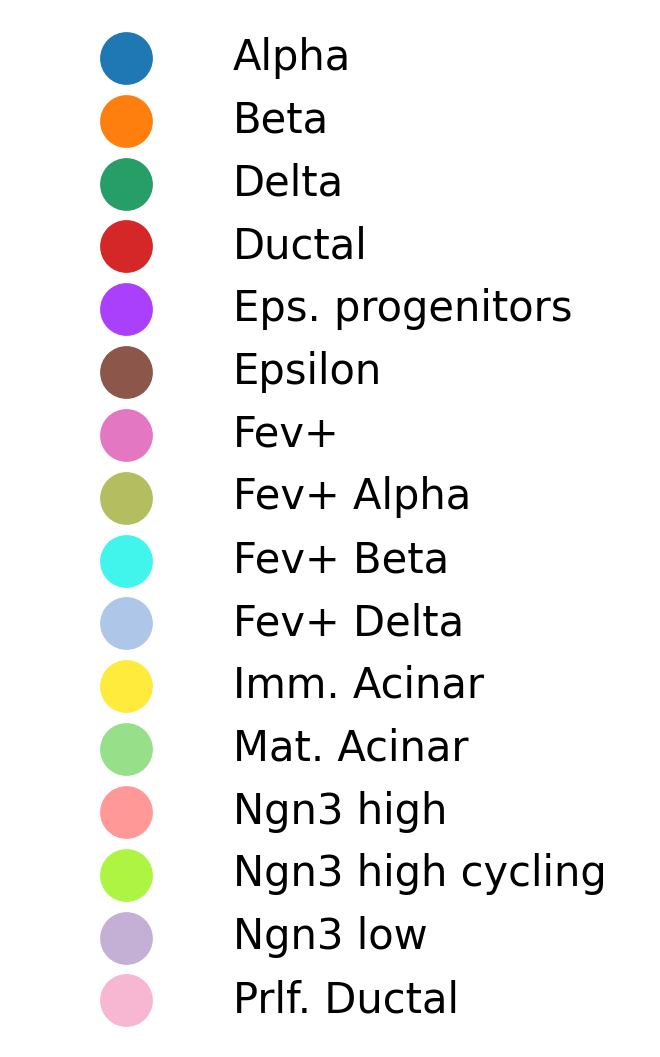

In [29]:
figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, fontsize=25, loc="center", bbox_to_anchor=(0.5, 0.5), handlelength=3.5, markerscale=3.0, prop={"size": 15})



In [30]:
axl.figure.savefig(os.path.join(output_dir, 'legend_only.png'))

In [31]:
order = ["Mat. Acinar", "Imm. Acinar", "Prlf. Ductal", "Ductal", "Ngn3 low", "Ngn3 high cycling", "Ngn3 high", "Eps. progenitors", "Fev+", "Fev+ Alpha", "Fev+ Beta", "Fev+ Delta", "Alpha", "Beta", "Delta", "Epsilon"]

adata.obs["cell_type"] = adata.obs["cell_type"].cat.reorder_categories(order)

In [32]:
x,y = 'stage', 'cell_type'
df = adata.obs.copy()
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

/tmp/ipykernel_1870948/3179844693.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df.groupby(x)[y].value_counts(normalize=True)


/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


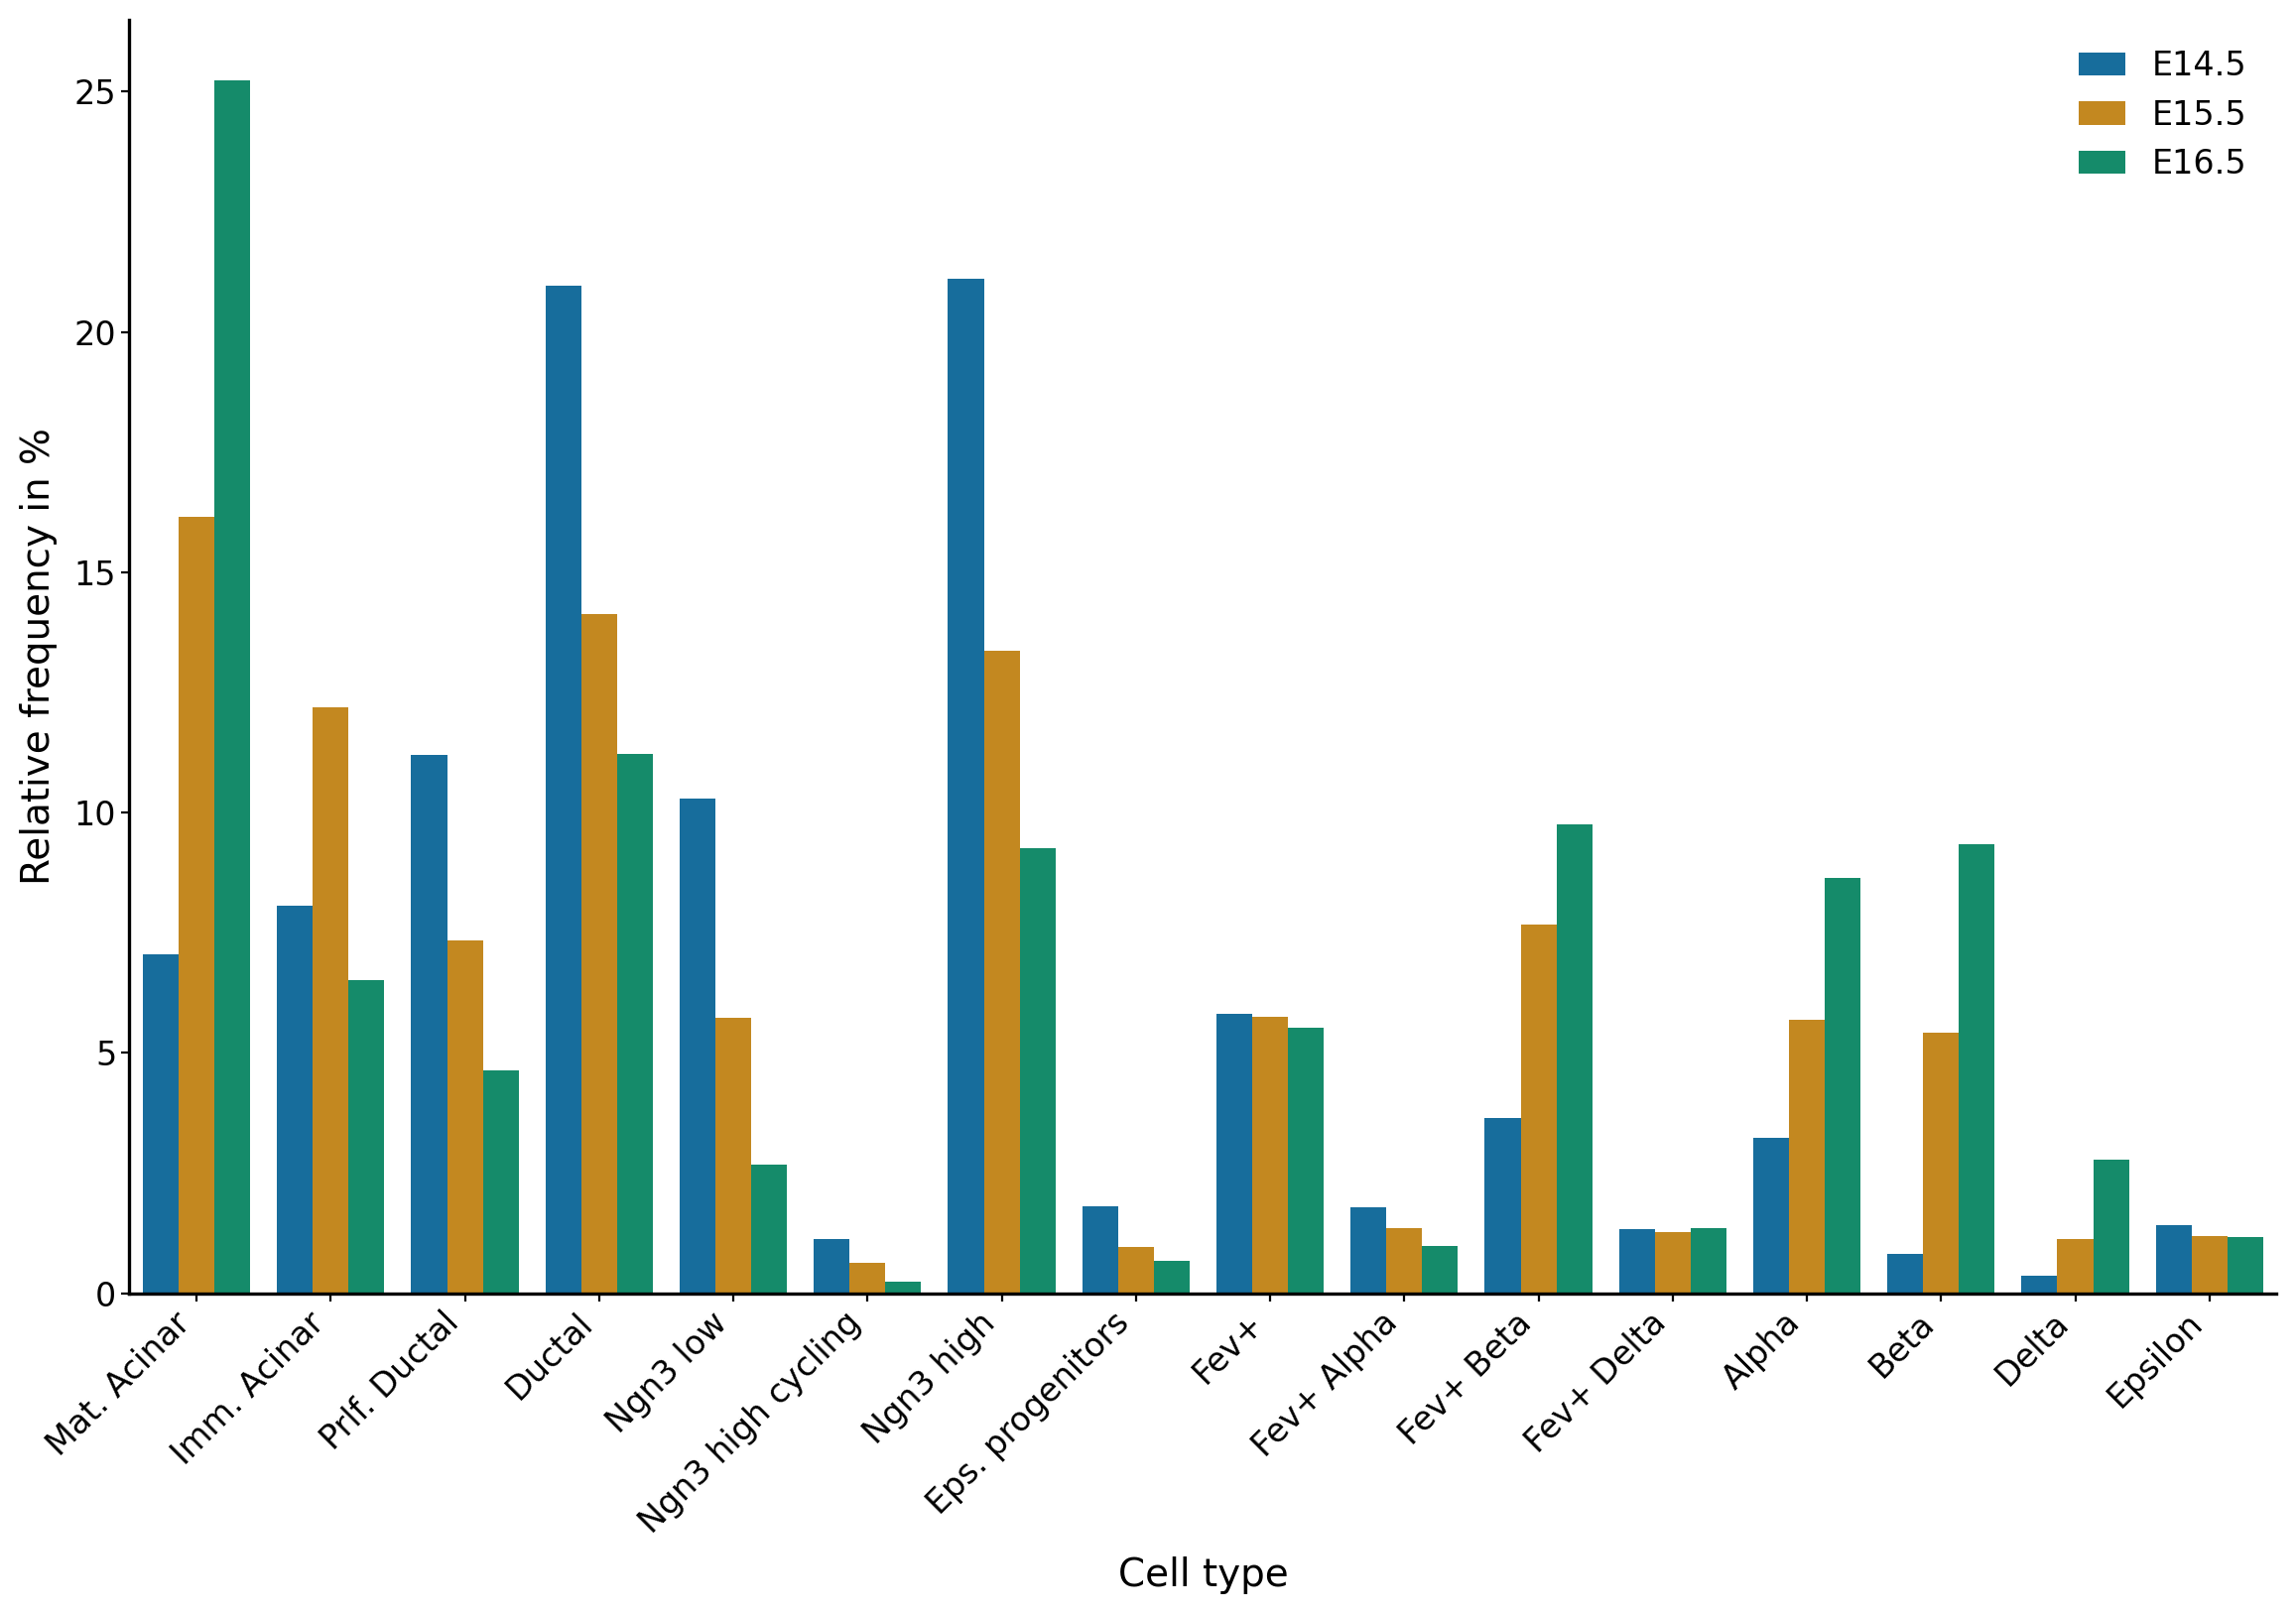

In [33]:
g = sns.catplot(x="cell_type",y='percent',hue=x,kind='bar',data=df1, legend=False,height=8.27, aspect=11.7/8.27, palette=sns.color_palette("colorblind", 3))
plt.xlabel("Cell type")
plt.ylabel("Relative frequency in %")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

In [34]:
fig = g.fig

In [35]:
fig.figure.savefig(os.path.join(output_dir, 'celltype_sample_distribution.png'))

In [36]:
x,y = 'stage', 'cell_type'
df2 = adata[~adata.obs["cell_type"].isin(["Mat. Acinar", "Imm. Acinar", "Ductal", "Prlf. Ductal"])].obs.copy()
df3 = df2.groupby(x)[y].value_counts(normalize=True)
df3 = df3.mul(100)
df3 = df3.rename('percent').reset_index()

/tmp/ipykernel_1870948/225109350.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = df2.groupby(x)[y].value_counts(normalize=True)


/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


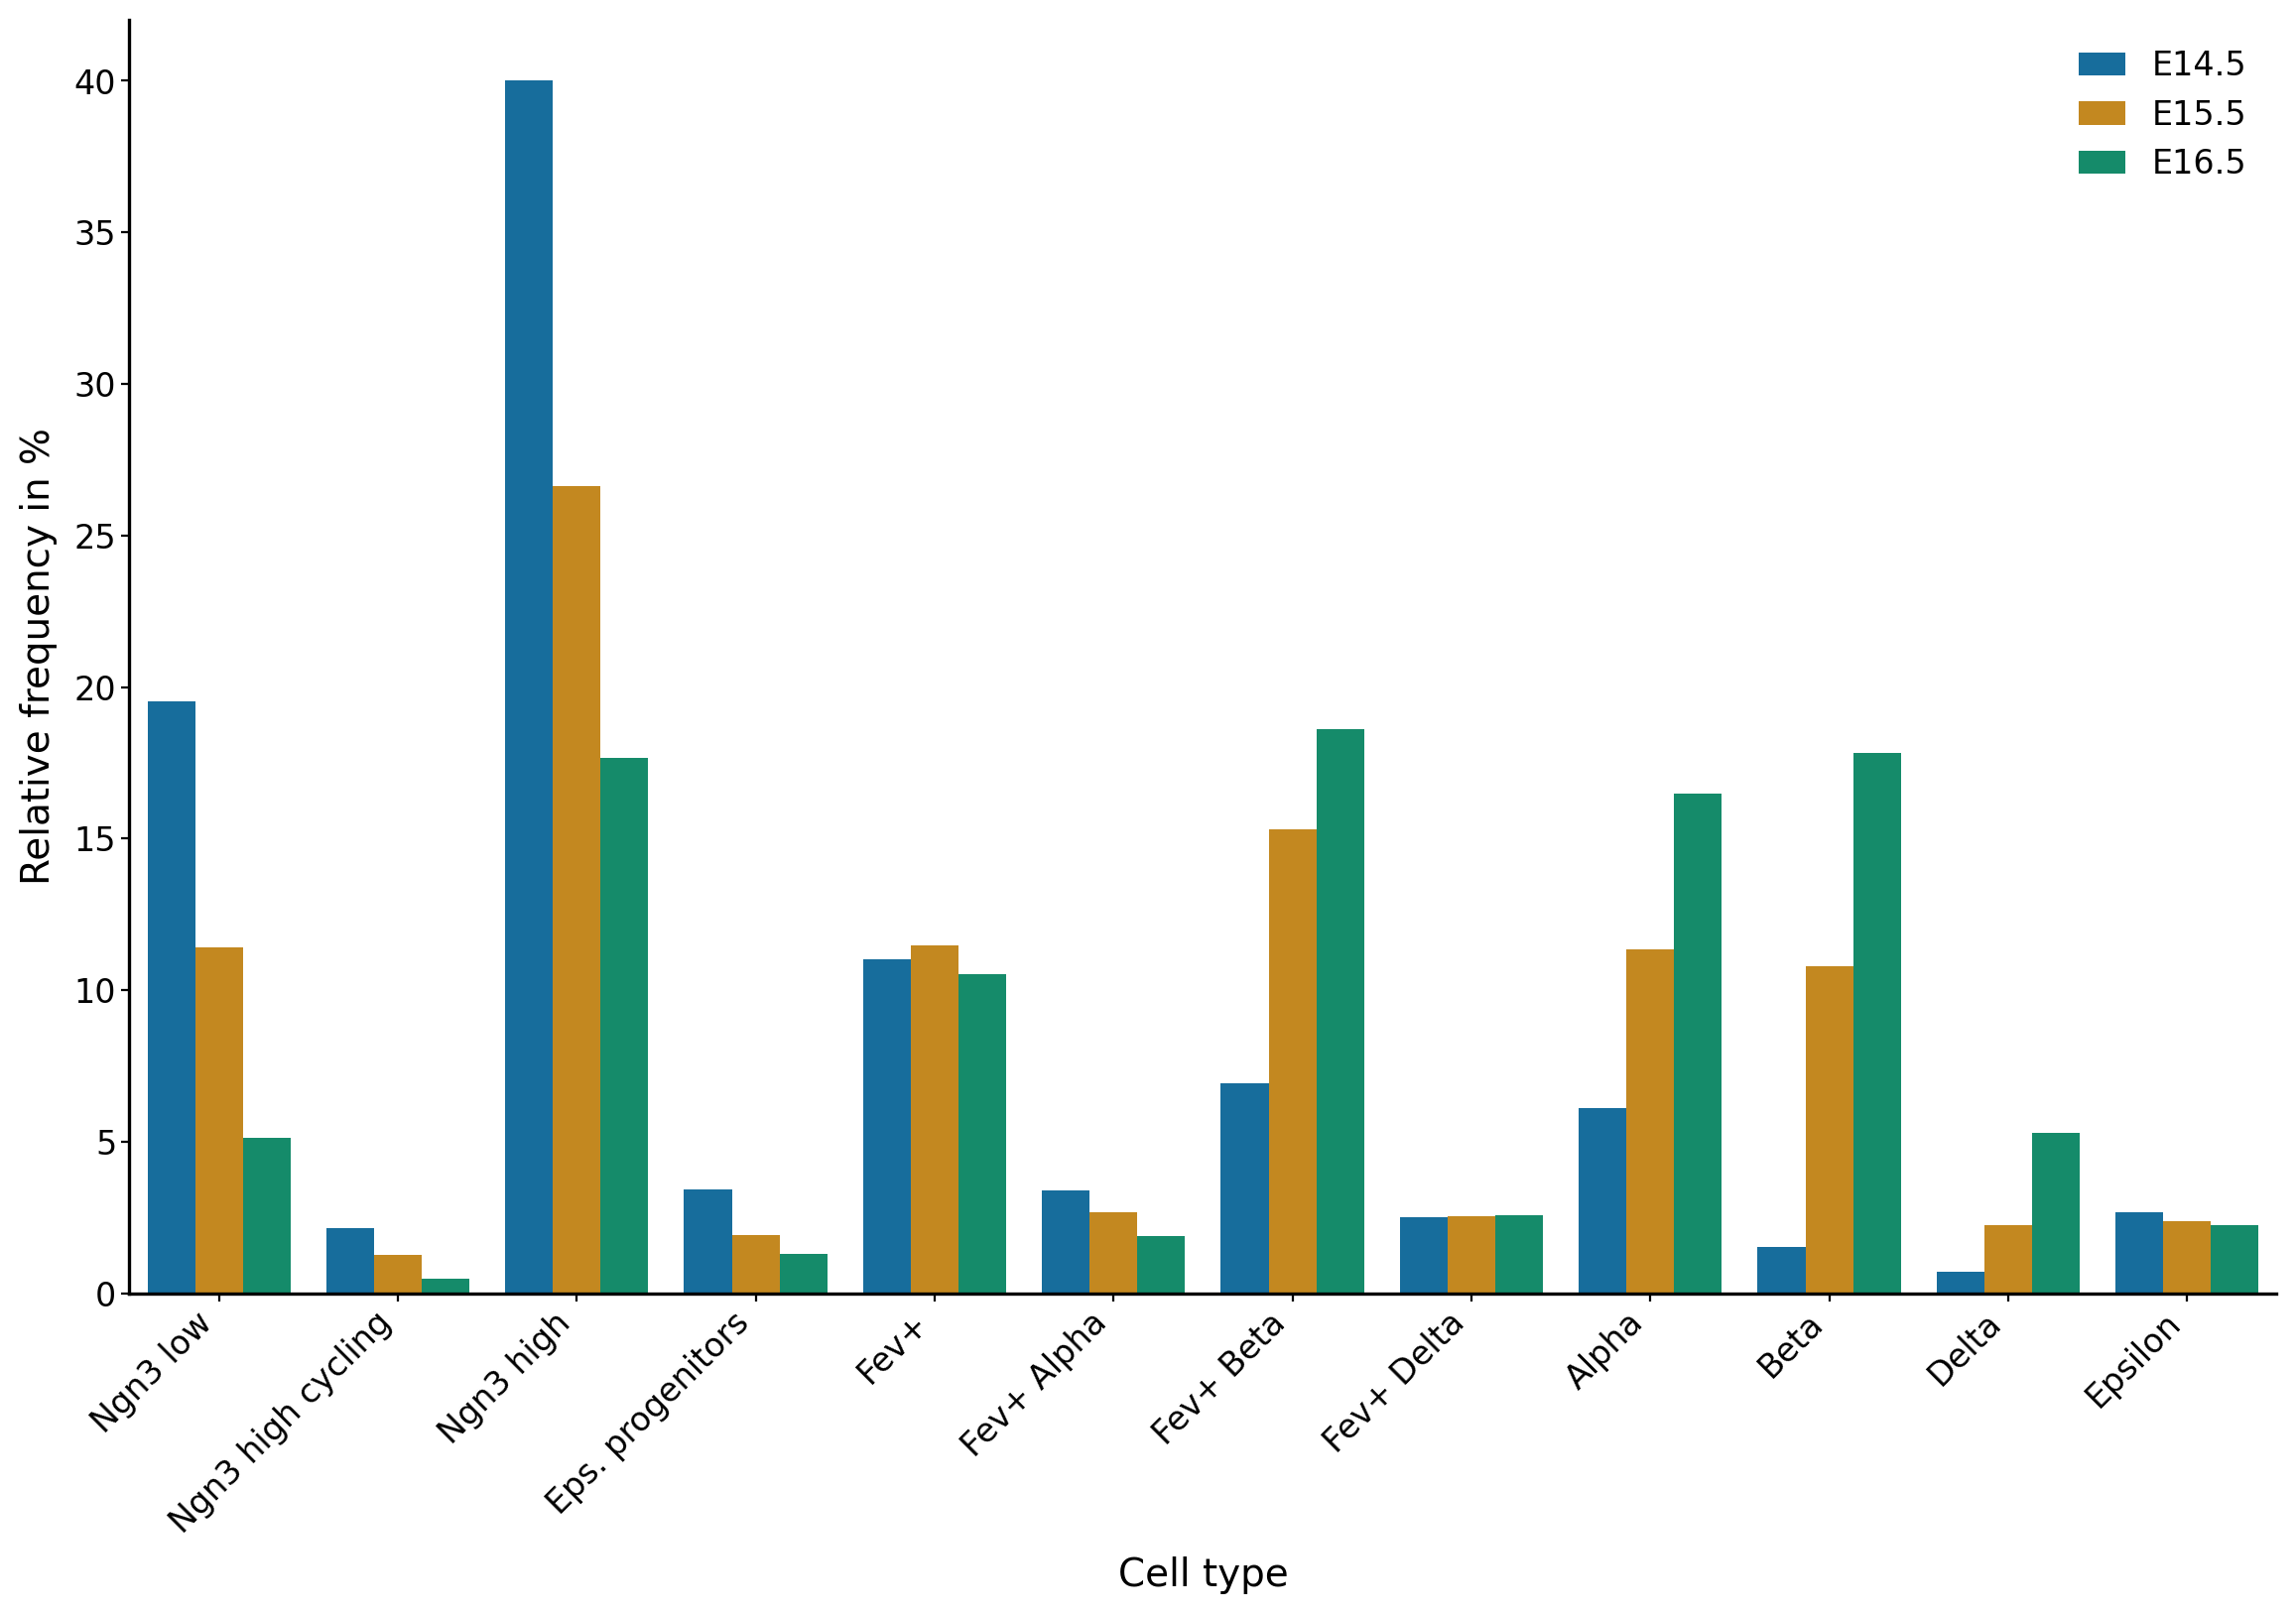

In [37]:
g = sns.catplot(x="cell_type",y='percent',hue=x,kind='bar',data=df3, legend=False,height=8.27, aspect=11.7/8.27, palette=sns.color_palette("colorblind", 3))
plt.xlabel("Cell type")
plt.ylabel("Relative frequency in %")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

In [38]:
fig = g.fig

In [39]:
fig.figure.savefig(os.path.join(output_dir, 'celltype_sample_distribution_reduced.png'))